In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
# Define a simple CNN model with activation activation and optional BatchNorm
class DeepSigmoidCNN(nn.Module):
    def __init__(self, use_relu=False):
        super(DeepSigmoidCNN, self).__init__()
        self.use_relu = use_relu
        
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
            
        if self.use_relu:
            self.activation = nn.ReLU()
        else : 
            self.activation = nn.Sigmoid()
        self.fc = None  # Placeholder for dynamically setting fc layer
    
    def forward(self, x):
        activations = []
        x = self.conv1(x)
        x = self.activation(x)
        activations.append(x)
        
        x = self.conv2(x)
        x = self.activation(x)
        activations.append(x)
        
        x = self.conv3(x)
        x = self.activation(x)
        activations.append(x)
        
        x = self.conv4(x)
        x = self.activation(x)
        activations.append(x)
        
        x = self.conv5(x)
        x = self.activation(x)
        activations.append(x)
        
        x = self.conv6(x)
        x = self.activation(x)
        activations.append(x)
        
        x = self.conv7(x)
        x = self.activation(x)
        activations.append(x)
        
        x = torch.flatten(x, start_dim=1)
        if self.fc is None:
            self.fc = nn.Linear(x.shape[1], 10).to(x.device)
        x = self.fc(x)
        return x, activations

In [3]:
# Load dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

In [4]:
# Initialize models (with and without BatchNorm)
model_no_relu = DeepSigmoidCNN(use_relu=False).to(device)
model_relu = DeepSigmoidCNN(use_relu=True).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_no_relu.parameters(), lr=0.1)

In [5]:
# Get a single image
images, labels = next(iter(data_loader))
images = images.to(device)
labels = labels.to(device)

In [6]:
# Forward pass without BatchNorm
model_no_relu.eval()
with torch.no_grad():
    _, activations_no_relu = model_no_relu(images)

In [7]:
# Forward pass without BatchNorm
model_relu.eval()
with torch.no_grad():
    _, activations_relu = model_relu(images)

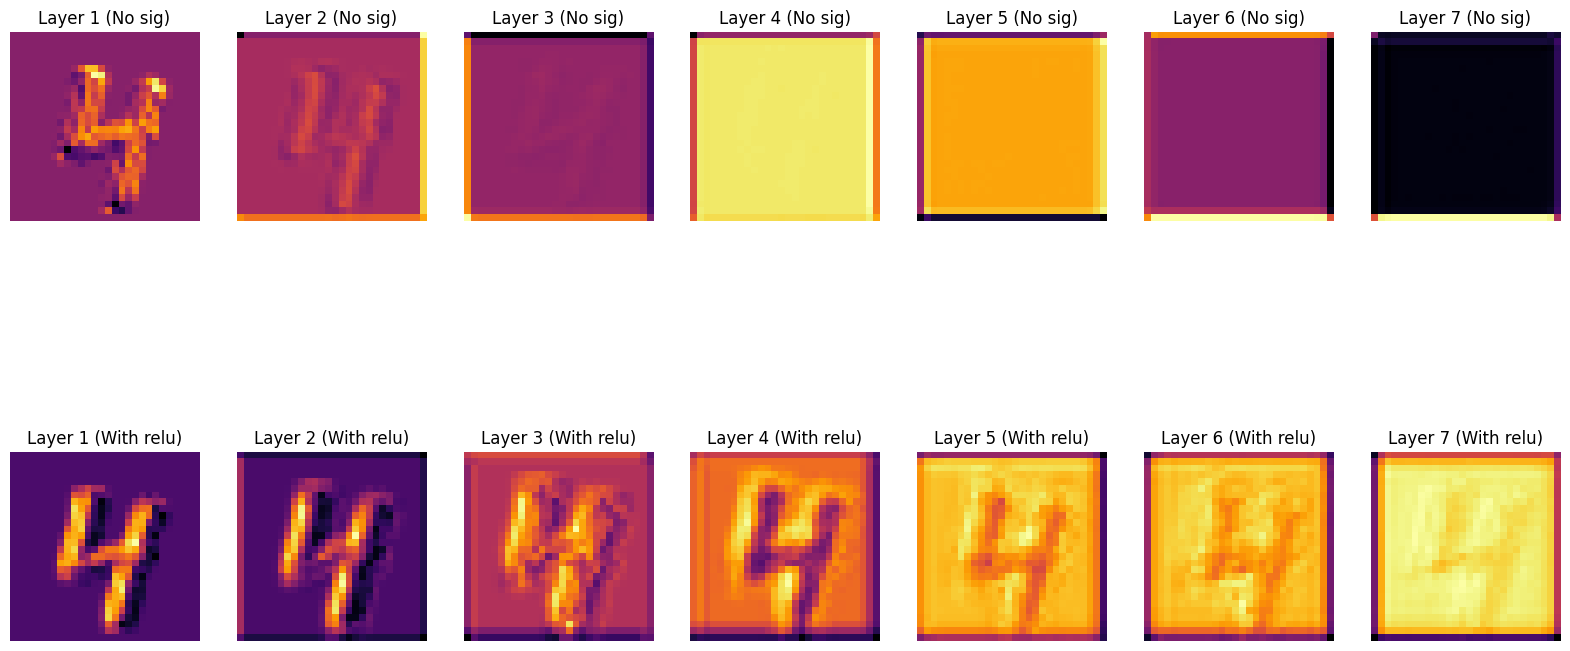

In [8]:
# Plot feature maps comparison
fig, axes = plt.subplots(2, len(activations_no_relu), figsize=(20, 10))
for i in range(len(activations_no_relu)):
    feature_map_no_relu = activations_no_relu[i].squeeze(0).cpu().numpy()
    mean_feature_map_no_relu = np.mean(feature_map_no_relu, axis=0)
    axes[0, i].imshow(mean_feature_map_no_relu, cmap='inferno')
    axes[0, i].set_title(f'Layer {i+1} (No sig)')
    axes[0, i].axis('off')
    
    feature_map_relu = activations_relu[i].squeeze(0).cpu().numpy()
    mean_feature_map_relu = np.mean(feature_map_relu, axis=0)
    axes[1, i].imshow(mean_feature_map_relu, cmap='inferno')
    axes[1, i].set_title(f'Layer {i+1} (With relu)')
    axes[1, i].axis('off')

plt.show()